In [22]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import math

In [28]:
# load data
acc = np.load('MDSAGT_V1 2022-05-23 10-48-50/acc_butt_manu_1_quad.npy')
acc_shape = acc.shape
print(acc_shape)

(5879, 4)


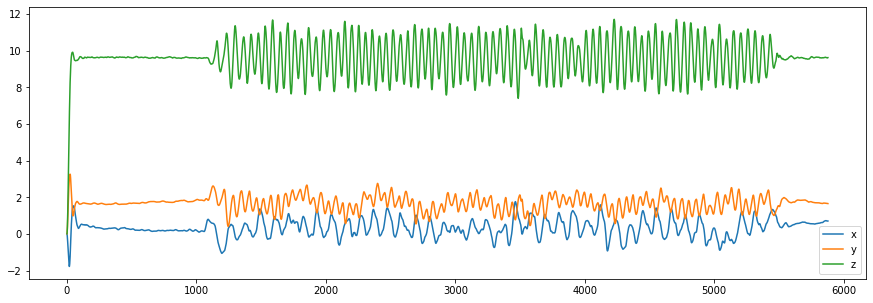

In [9]:
# plot flattened accelerometer
plt.figure(figsize=(15, 5))

plt.plot(acc[:,1], label='x')
plt.plot(acc[:,2], label='y')
plt.plot(acc[:,3], label='z')
plt.legend()
plt.show()

In [19]:
# find peaks in each achsis
x = signal.find_peaks(acc[:,1])
y = signal.find_peaks(acc[:,2])
z = signal.find_peaks(acc[:,3])

print('Peaks in x, y, z:', x[0].shape, y[0].shape, z[0].shape)

Peaks in x, y, z: (119,) (126,) (154,)


In [41]:
# get normal acceleration:
# https://physics.stackexchange.com/questions/335197/get-acceleration-from-accelerometer
# absolute acceleration is perfectly fine for this matter (skript)

a = np.zeros((acc_shape[0],2))
for i in range(acc_shape[0]):
    a[i-1,1] = math.sqrt(acc[i-1,1]**2 + acc[i-1,2]**2 + acc[i-1,3]**2)
a[:,0] = acc[:,0]
print(a.shape)

(5879, 2)


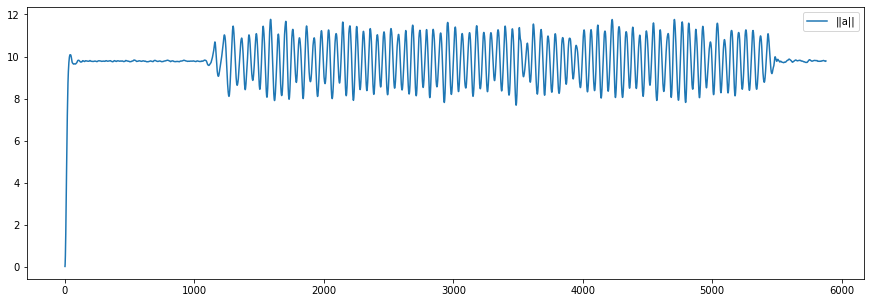

In [44]:
# plot absolute acceleration
plt.figure(figsize=(15, 5))

plt.plot(a[:,1], label='||a||')
plt.legend()
plt.show()

In [54]:
# find peaks in absolute acceleration -> resulting in steps
a_peaks = signal.find_peaks(a[:,1])
steps = a_peaks[0].shape

print('Peaks in ||a||:', steps[0])
print('Peak equals Step, therefore', steps[0], 'Steps.')

Peaks in ||a||: 150
Peak equals Step, therefore 150 Steps.


In [55]:
print(a_peaks)

(array([  39,   43,   73,  104,  125,  138,  159,  166,  180,  192,  214,
        231,  262,  274,  290,  299,  318,  350,  381,  405,  412,  430,
        442,  470,  491,  519,  534,  558,  574,  602,  620,  634,  661,
        694,  731,  767,  792,  831,  862,  871,  891,  917,  938,  954,
        966,  974,  991, 1021, 1044, 1057, 1077, 1083, 1158, 1231, 1299,
       1365, 1421, 1478, 1531, 1588, 1648, 1706, 1760, 1811, 1866, 1925,
       1981, 2036, 2094, 2146, 2201, 2253, 2306, 2358, 2413, 2465, 2518,
       2577, 2633, 2686, 2742, 2793, 2844, 2902, 2956, 3015, 3068, 3125,
       3180, 3235, 3290, 3345, 3400, 3456, 3510, 3572, 3618, 3678, 3731,
       3787, 3845, 3898, 3949, 4010, 4064, 4116, 4171, 4227, 4280, 4335,
       4386, 4440, 4491, 4546, 4598, 4660, 4708, 4768, 4819, 4873, 4927,
       4986, 5039, 5094, 5149, 5204, 5260, 5315, 5373, 5431, 5486, 5506,
       5529, 5559, 5594, 5645, 5672, 5681, 5694, 5710, 5725, 5751, 5788,
       5795, 5808, 5822, 5835, 5847, 5858, 5868]),

In [57]:
print(a[39,:])

[ 0.397401   10.08612933]


# PROBLEM? NICHT FLACH GENUG, ES GIBT WOHL NOCH LOKALE MAXIMA VOR DEM LAUFEN, WEIL HAND ZITTERT!